In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
insurance=pd.read_csv("insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insur_one_hot=pd.get_dummies(insurance)

In [5]:
insur_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
X=insur_one_hot.drop("charges",axis=1)

In [7]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [8]:
y=insur_one_hot["charges"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0


In [12]:
len(X_train),len(y_test)

(1070, 268)

In [13]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])
history=model.fit(X_train,y_train,epochs=100,verbose=0)

In [14]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 899us/step - loss: 7000.7295 - mae: 7000.7295


[7000.7294921875, 7000.7294921875]

In [15]:
y_pred=model.predict(X_test)

In [16]:
y_pred

array([[ 9072.719 ],
       [ 7372.5117],
       [12787.798 ],
       [ 9275.977 ],
       [ 4104.762 ],
       [ 7150.054 ],
       [ 3973.3418],
       [12912.462 ],
       [ 5657.918 ],
       [ 9896.432 ],
       [ 6161.9663],
       [ 8360.473 ],
       [ 6011.837 ],
       [ 9500.472 ],
       [12186.842 ],
       [ 9646.0625],
       [10070.422 ],
       [ 9613.078 ],
       [ 9296.024 ],
       [ 8706.676 ],
       [ 5181.07  ],
       [ 8773.57  ],
       [ 4070.6658],
       [ 4778.0977],
       [10085.305 ],
       [10906.375 ],
       [12100.098 ],
       [ 5644.4897],
       [ 9479.511 ],
       [ 3873.9175],
       [ 8161.1836],
       [11476.578 ],
       [ 4518.844 ],
       [ 6094.665 ],
       [ 5431.3545],
       [ 9246.116 ],
       [ 4415.676 ],
       [ 8735.628 ],
       [10426.107 ],
       [ 7455.3887],
       [ 4076.5637],
       [ 4672.29  ],
       [11337.039 ],
       [11782.563 ],
       [ 6871.1196],
       [11812.765 ],
       [ 4514.115 ],
       [ 5177

In [17]:
tf.round(y_pred)

<tf.Tensor: shape=(268, 1), dtype=float32, numpy=
array([[ 9073.],
       [ 7373.],
       [12788.],
       [ 9276.],
       [ 4105.],
       [ 7150.],
       [ 3973.],
       [12912.],
       [ 5658.],
       [ 9896.],
       [ 6162.],
       [ 8360.],
       [ 6012.],
       [ 9500.],
       [12187.],
       [ 9646.],
       [10070.],
       [ 9613.],
       [ 9296.],
       [ 8707.],
       [ 5181.],
       [ 8774.],
       [ 4071.],
       [ 4778.],
       [10085.],
       [10906.],
       [12100.],
       [ 5644.],
       [ 9480.],
       [ 3874.],
       [ 8161.],
       [11477.],
       [ 4519.],
       [ 6095.],
       [ 5431.],
       [ 9246.],
       [ 4416.],
       [ 8736.],
       [10426.],
       [ 7455.],
       [ 4077.],
       [ 4672.],
       [11337.],
       [11783.],
       [ 6871.],
       [11813.],
       [ 4514.],
       [ 5177.],
       [ 8836.],
       [ 6516.],
       [12699.],
       [ 3870.],
       [ 8300.],
       [ 3825.],
       [11313.],
       [10131.]

In [18]:
mae_1=tf.keras.losses.mae(y_test,tf.squeeze(y_pred)).numpy()

In [19]:
mae_1

7000.7285

In [20]:
mse_1=tf.keras.losses.mse(y_test,tf.squeeze(y_pred)).numpy()

In [21]:
mse_1

163108670.0

In [22]:
tf.random.set_seed(42)
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])
model1.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["mae"])
history=model1.fit(X_train,y_train,epochs=100,verbose=0)

In [23]:
model1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8032.4385 - mae: 8032.4385


[8032.4384765625, 8032.4384765625]

In [24]:
y_preds=model1.predict(X_test)

In [25]:
mae_2=tf.keras.losses.mae(y_test,tf.squeeze(y_preds)).numpy()

In [26]:
mae_2

8032.4385

In [27]:
mse_2=tf.keras.losses.mse(y_test,tf.squeeze(y_preds)).numpy()

In [28]:
mse_2

107633590.0

In [29]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])
model2.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
history=model2.fit(X_train,y_train,epochs=100,verbose=0)

In [30]:
model2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 840us/step - loss: 2193.9216 - mae: 2193.9216


[2193.921630859375, 2193.921630859375]

In [31]:
y_preds=model2.predict(X_test)

In [32]:
mae_3=tf.keras.losses.mae(y_test,tf.squeeze(y_preds)).numpy()

In [33]:
mae_3

2193.9214

In [34]:
mse_3=tf.keras.losses.mse(y_test,tf.squeeze(y_preds)).numpy()

In [35]:
mse_3

26242582.0

In [36]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])
model3.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])
history=model3.fit(X_train,y_train,epochs=100,verbose=0)

In [37]:
model3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 852us/step - loss: 1884.9213 - mae: 1884.9213


[1884.9212646484375, 1884.9212646484375]

In [38]:
y_pred=model3.predict(X_test)

In [39]:
mae_4=tf.keras.losses.mae(y_test,tf.squeeze(y_pred)).numpy()

In [40]:
mae_4

1884.9211

In [41]:
mse_4=tf.keras.losses.mse(y_test,tf.squeeze(y_pred)).numpy()

In [42]:
mse_4

22581392.0

In [43]:
import tensorflow as tf
import pandas as pd

In [44]:
insur=pd.read_csv("insurance.csv")

In [45]:
insur.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
X=insur.drop("charges",axis=1)

In [47]:
y=insur["charges"]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              random_state=42)


In [50]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [51]:
ct=make_column_transformer((MinMaxScaler(),["age","bmi","children"]),
                          (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]))
ct.fit(X_train)
X_train_norm=ct.transform(X_train)
X_test_norm=ct.transform(X_test)

In [52]:
tf.random.set_seed(42)
model4=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])
model4.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])
history=model4.fit(X_train_norm,y_train,epochs=100,verbose=0)

In [53]:
model4.evaluate(X_test_norm,y_test)

9/9 [==============================] - 0s 839us/step - loss: 1774.5952 - mae: 1774.5952


[1774.59521484375, 1774.59521484375]

In [54]:
y_pred=model4.predict(X_test_norm)

In [55]:
mae_5=tf.keras.losses.mae(y_test,tf.squeeze(y_pred)).numpy()

In [56]:
mae_5

1774.5951

In [57]:
mse_5=tf.keras.losses.mse(y_test,tf.squeeze(y_pred)).numpy()

In [58]:
mse_5

21317378.0

In [59]:
tf.random.set_seed(42)
model5=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])
model5.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
history=model5.fit(X_train_norm,y_train,epochs=100,verbose=0)

In [60]:
model5.evaluate(X_test_norm,y_test)

9/9 [==============================] - 0s 917us/step - loss: 1764.5984 - mae: 1764.5984


[1764.598388671875, 1764.598388671875]

In [61]:
y_pred=model5.predict(X_test_norm)

In [62]:
mae_6=tf.keras.losses.mae(y_test,tf.squeeze(y_pred)).numpy()

In [63]:
mae_6

1764.5985

In [64]:
mse_6=tf.keras.losses.mse(y_test,tf.squeeze(y_pred)).numpy()

In [65]:
mse_6

21098902.0

In [66]:
tf.random.set_seed(42)
model6=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])
model6.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])
history=model6.fit(X_train_norm,y_train,epochs=200,verbose=0)

In [67]:
model6.evaluate(X_test_norm,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1464.4604 - mae: 1464.4604


[1464.46044921875, 1464.46044921875]

In [68]:
y_pred=model6.predict(X_test_norm)

In [69]:
mae_7=tf.keras.losses.mae(y_test,tf.squeeze(y_pred)).numpy()

In [70]:
mae_7

1464.4604

In [71]:
mse_7=tf.keras.losses.mse(y_test,tf.squeeze(y_pred)).numpy()

In [72]:
mse_7

19725740.0

<AxesSubplot:>

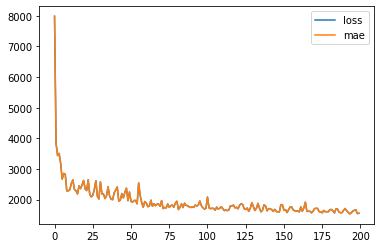

In [73]:
pd.DataFrame(history.history).plot()

In [74]:
models=[["model",mae_1,mse_1],["model1",mae_2,mse_2],["model2",mae_3,mse_3],
       ["model3",mae_4,mse_4],["model4",mae_5,mse_5],
       ["model5",mae_6,mse_6],["model6",mae_7,mse_7],]


In [75]:
models=pd.DataFrame(models,columns=["Models","MAE","MSE"])

In [76]:
models

,Models,MAE,MSE
0,model,7000.728516,163108672.0
1,model1,8032.438477,107633592.0
2,model2,2193.921387,26242582.0
3,model3,1884.921143,22581392.0
4,model4,1774.595093,21317378.0
5,model5,1764.598511,21098902.0
6,model6,1464.460449,19725740.0


In [77]:
from tensorflow.keras.utils import plot_model

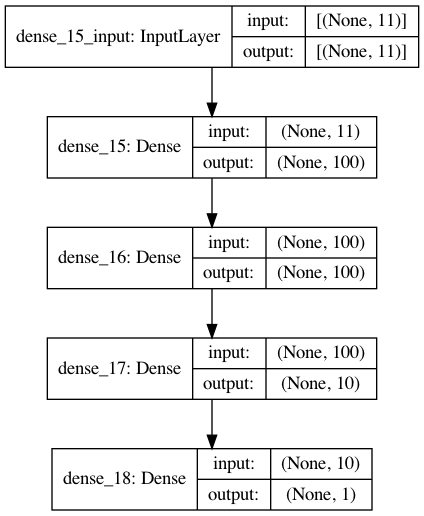

In [78]:
plot_model(model6,show_shapes=True)

In [79]:
from sklearn.metrics import confusion_matrix


In [80]:
y_test.shape

(268,)

In [81]:
X_test_norm[0]

array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [82]:
y_pred=model6.predict(X_test_norm)

In [83]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

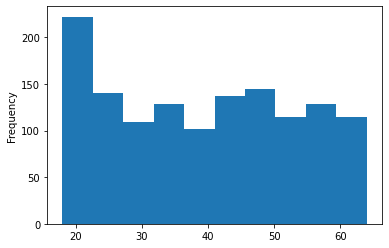

In [84]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

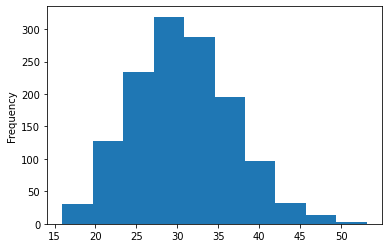

In [85]:
X["bmi"].plot(kind="hist")

In [86]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [87]:
y_test=tf.one_hot(y_test,depth=268)

In [88]:
y_test

<tf.Tensor: shape=(268, 268), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [89]:
y_pred

array([[ 8906.8125],
       [ 5244.462 ],
       [27625.629 ],
       [ 9086.793 ],
       [32547.434 ],
       [ 4498.6006],
       [ 2108.353 ],
       [13728.852 ],
       [ 3576.9368],
       [ 9977.133 ],
       [17371.596 ],
       [ 7130.7373],
       [ 3896.703 ],
       [44781.273 ],
       [47446.094 ],
       [43142.996 ],
       [ 9662.797 ],
       [41443.918 ],
       [ 8135.1406],
       [21043.309 ],
       [ 4974.471 ],
       [ 7253.8076],
       [ 1195.2069],
       [ 2707.3677],
       [10841.572 ],
       [10747.821 ],
       [12184.234 ],
       [ 5175.3315],
       [ 9523.768 ],
       [ 1132.228 ],
       [ 8121.0835],
       [11575.691 ],
       [ 2092.5798],
       [ 5691.6367],
       [ 2800.0535],
       [ 7248.6978],
       [ 2562.198 ],
       [ 7205.8613],
       [22894.143 ],
       [37920.73  ],
       [ 4574.929 ],
       [ 2640.8674],
       [11305.735 ],
       [11769.1045],
       [ 4869.6562],
       [11840.945 ],
       [ 3580.7798],
       [ 4295